In [1]:
import argparse
import logging
import os

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
import segmentation_models_pytorch as smp

from utils.data_loading import BasicDataset
from unet import UNet
from utils.utils import plot_img_and_mask

In [2]:
def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    net.eval()
    img = torch.from_numpy(BasicDataset.preprocess(full_img, scale_factor, is_mask=False))
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)
    print(img.shape)
    with torch.no_grad():
        output = net(img)

        if 5 > 1:
            probs = F.softmax(output, dim=1)[0]
        else:
            probs = torch.sigmoid(output)[0]

#        tf = transforms.Compose([
#            transforms.ToPILImage(),
#            transforms.Resize((full_img.size[1], full_img.size[0])),
#            transforms.ToTensor()
#        ])
#        full_mask = tf(probs.cpu()).squeeze()
        full_mask = probs.cpu()
    if 5 == 1:
        return (full_mask > out_threshold).numpy()
    else:
        return F.one_hot(full_mask.argmax(dim=0), 5).permute(2, 0, 1).numpy()


def get_args():
    parser = argparse.ArgumentParser(description='Predict masks from input images')
    parser.add_argument('--model', '-m', default='MODEL.pth', metavar='FILE',
                        help='Specify the file in which the model is stored')
    parser.add_argument('--input', '-i', metavar='INPUT', nargs='+', help='Filenames of input images', required=True)
    parser.add_argument('--output', '-o', metavar='OUTPUT', nargs='+', help='Filenames of output images')
    parser.add_argument('--viz', '-v', action='store_true',
                        help='Visualize the images as they are processed')
    parser.add_argument('--no-save', '-n', action='store_true', help='Do not save the output masks')
    parser.add_argument('--mask-threshold', '-t', type=float, default=0.5,
                        help='Minimum probability value to consider a mask pixel white')
    parser.add_argument('--scale', '-s', type=float, default=0.5,
                        help='Scale factor for the input images')
    parser.add_argument('--bilinear', action='store_true', default=False, help='Use bilinear upsampling')

    return parser.parse_args()


def get_output_filenames(args):
    def _generate_name(fn):
        return f'{os.path.splitext(fn)[0]}_OUT.png'

    return args.output or list(map(_generate_name, args.input))


def mask_to_image(mask: np.ndarray):
    if mask.ndim == 2:
        return Image.fromarray((mask * 255).astype(np.uint8))
    elif mask.ndim == 3:
        return Image.fromarray((np.argmax(mask, axis=0) * 255 / mask.shape[0]).astype(np.uint8))

loading model
model loaded
predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000336_post_disaster.png
torch.Size([1, 3, 512, 512])


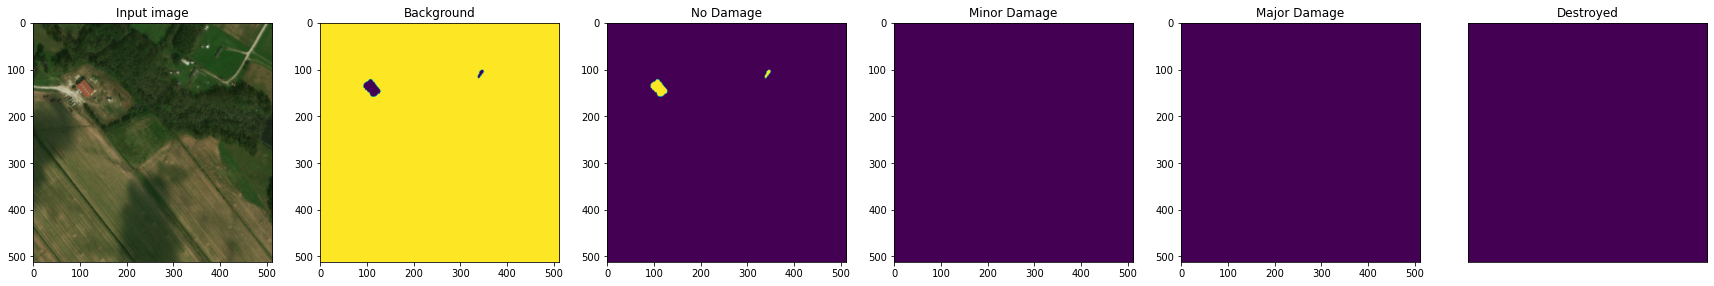

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000337_post_disaster.png
torch.Size([1, 3, 512, 512])


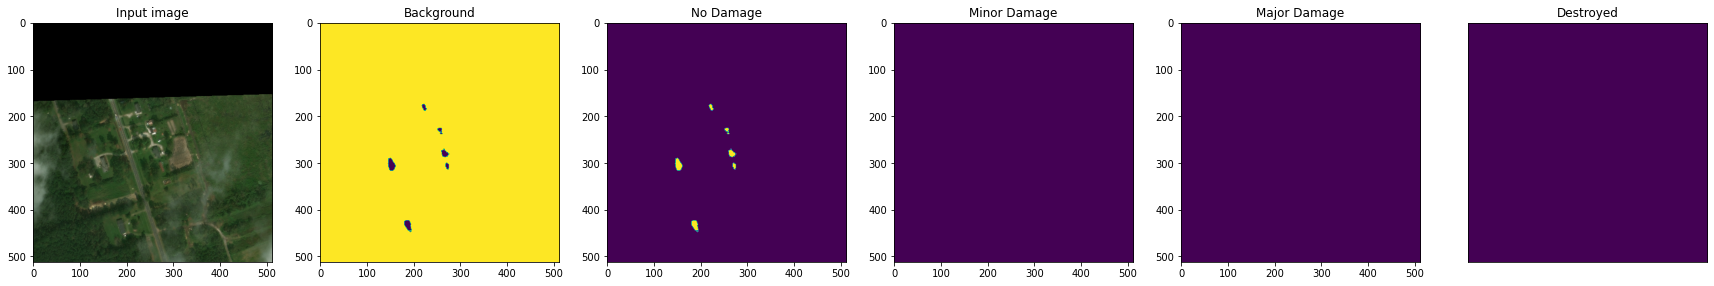

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000338_post_disaster.png
torch.Size([1, 3, 512, 512])


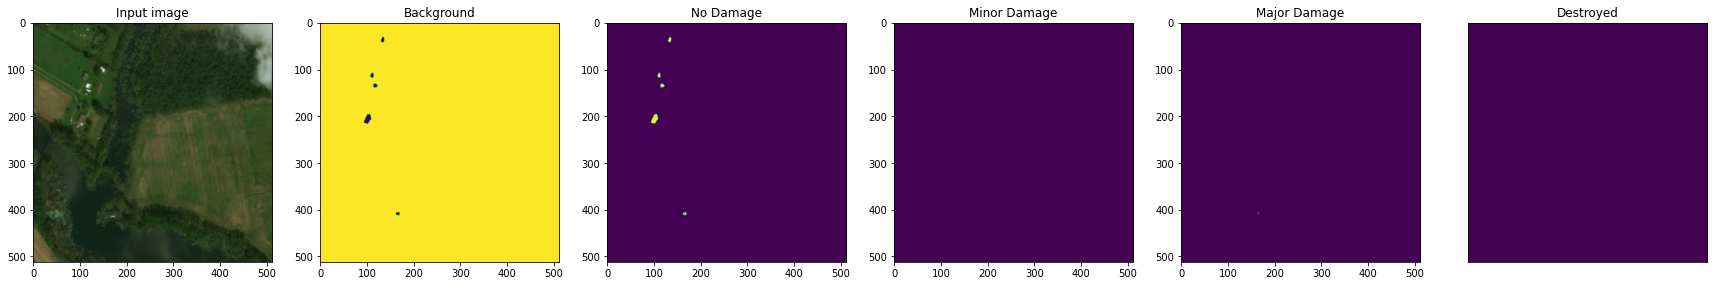

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000340_post_disaster.png
torch.Size([1, 3, 512, 512])


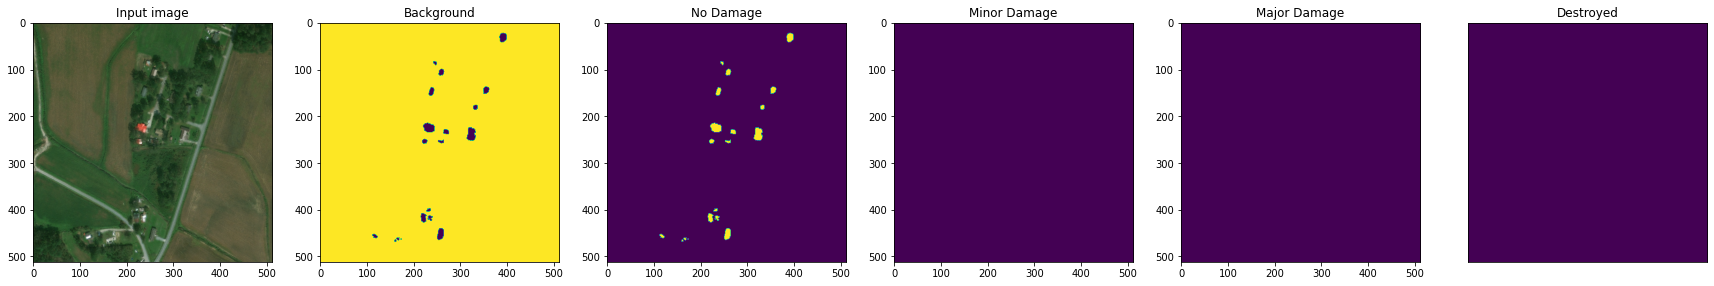

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000341_post_disaster.png
torch.Size([1, 3, 512, 512])


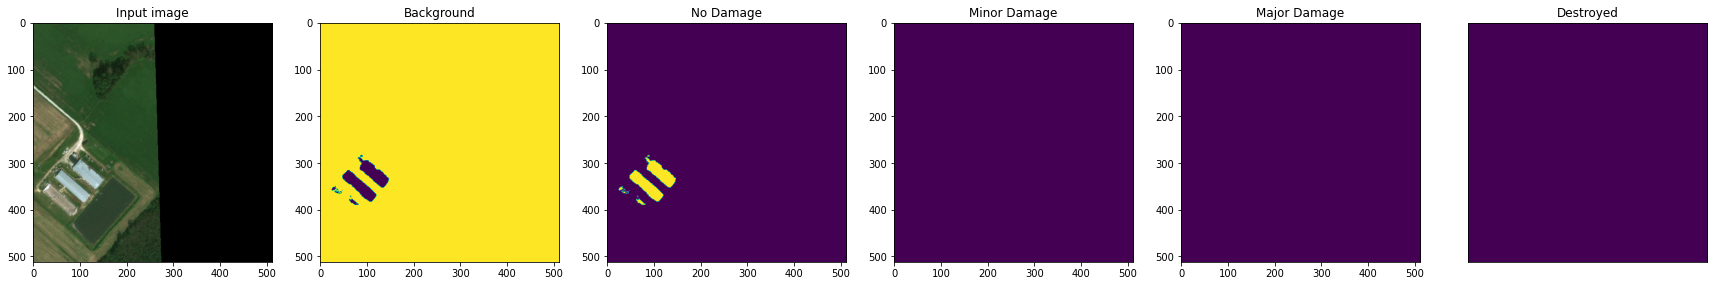

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000344_post_disaster.png
torch.Size([1, 3, 512, 512])


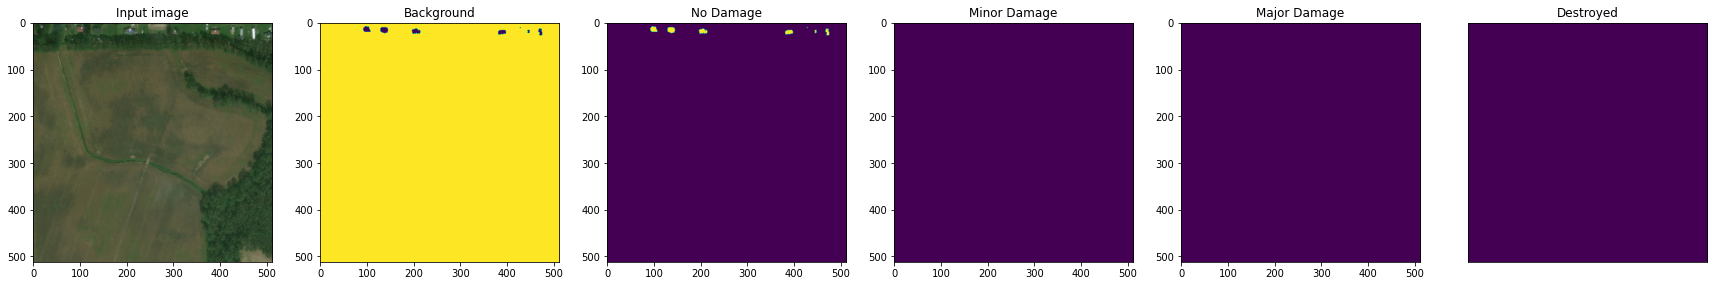

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000345_post_disaster.png
torch.Size([1, 3, 512, 512])


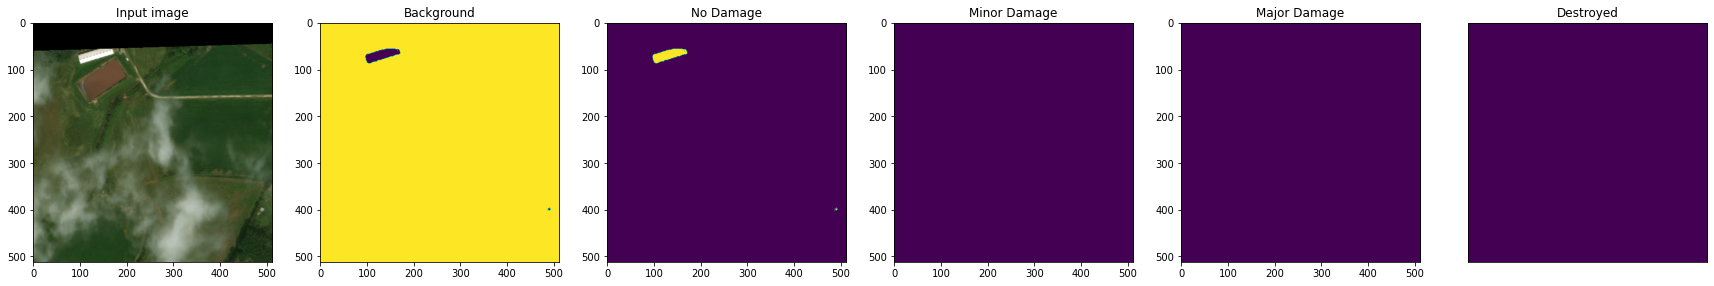

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000346_post_disaster.png
torch.Size([1, 3, 512, 512])


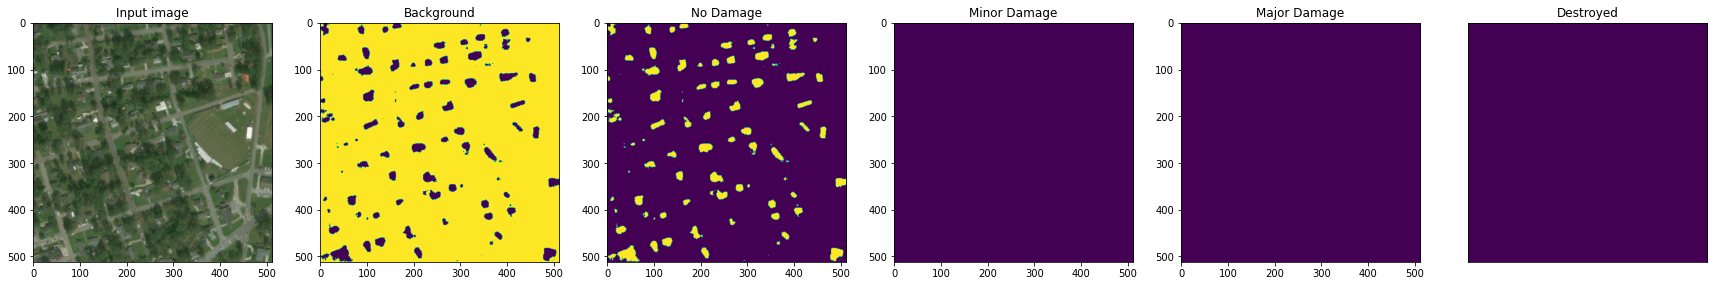

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000347_post_disaster.png
torch.Size([1, 3, 512, 512])


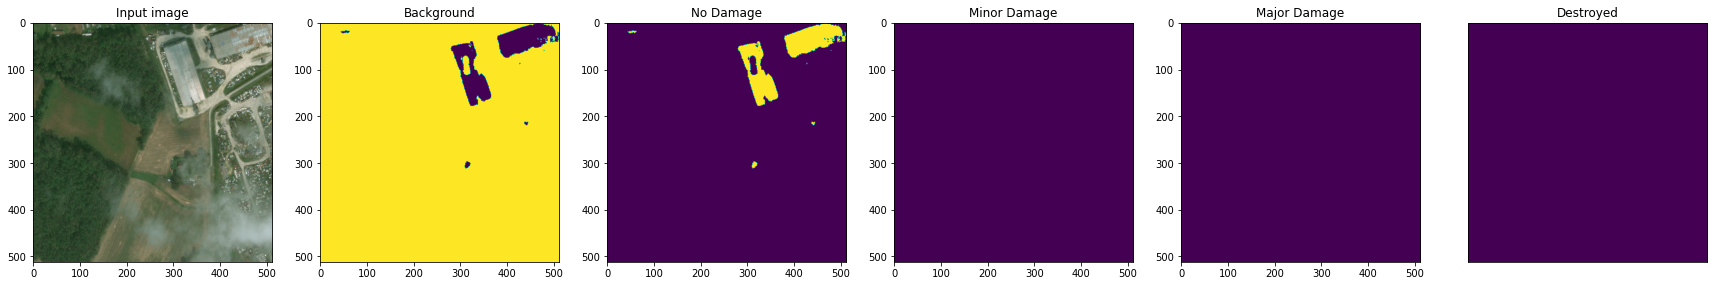

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000349_post_disaster.png
torch.Size([1, 3, 512, 512])


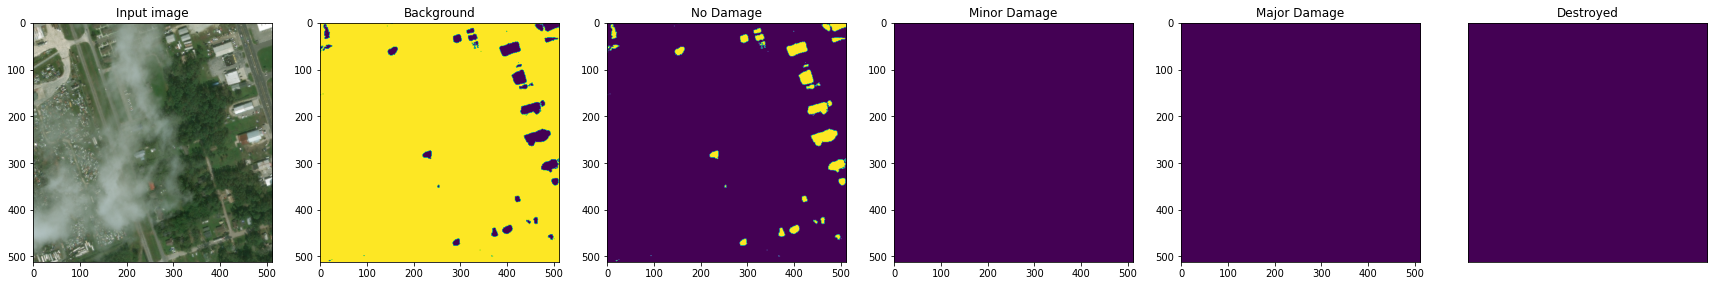

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000350_post_disaster.png
torch.Size([1, 3, 512, 512])


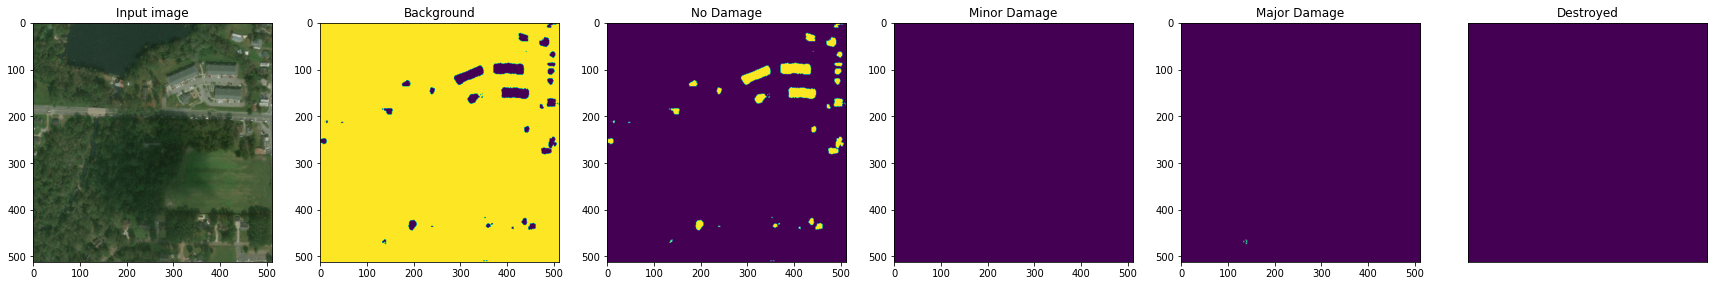

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000353_post_disaster.png
torch.Size([1, 3, 512, 512])


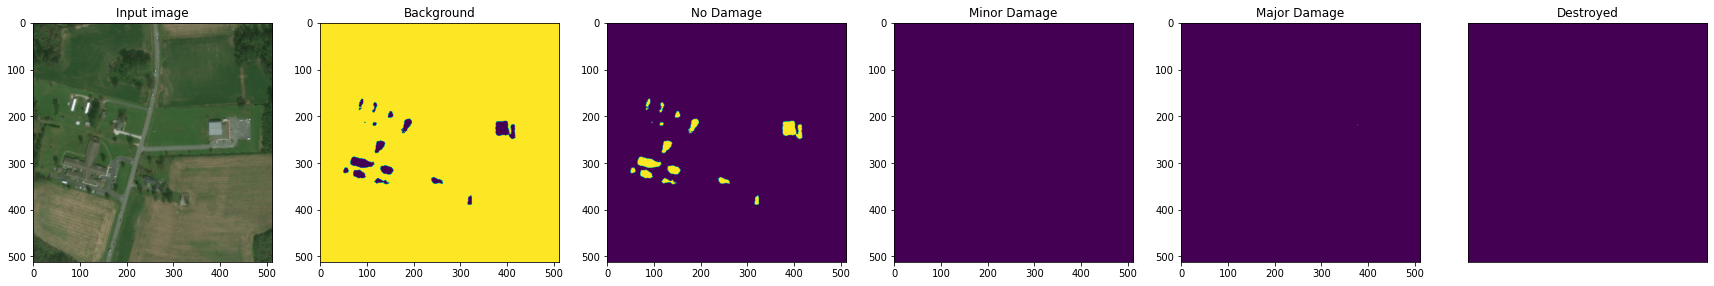

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000355_post_disaster.png
torch.Size([1, 3, 512, 512])


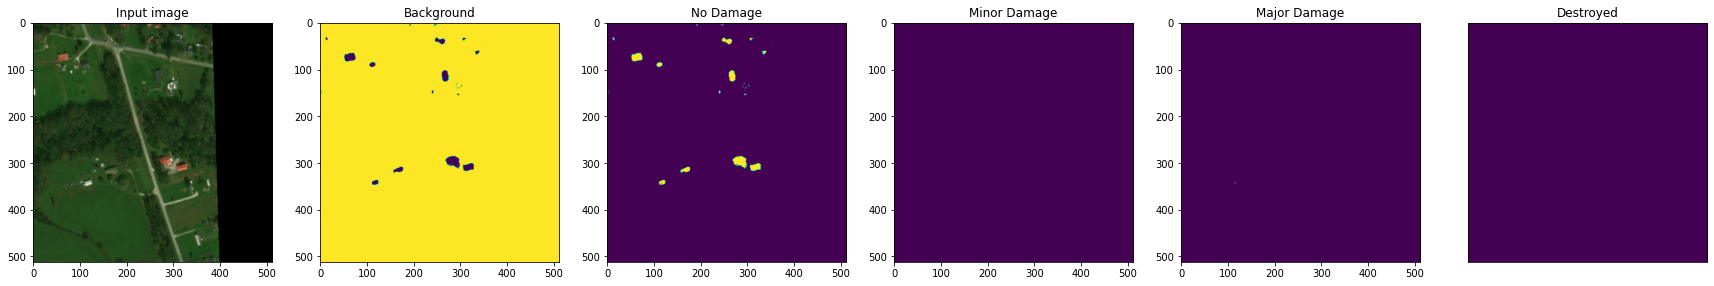

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000356_post_disaster.png
torch.Size([1, 3, 512, 512])


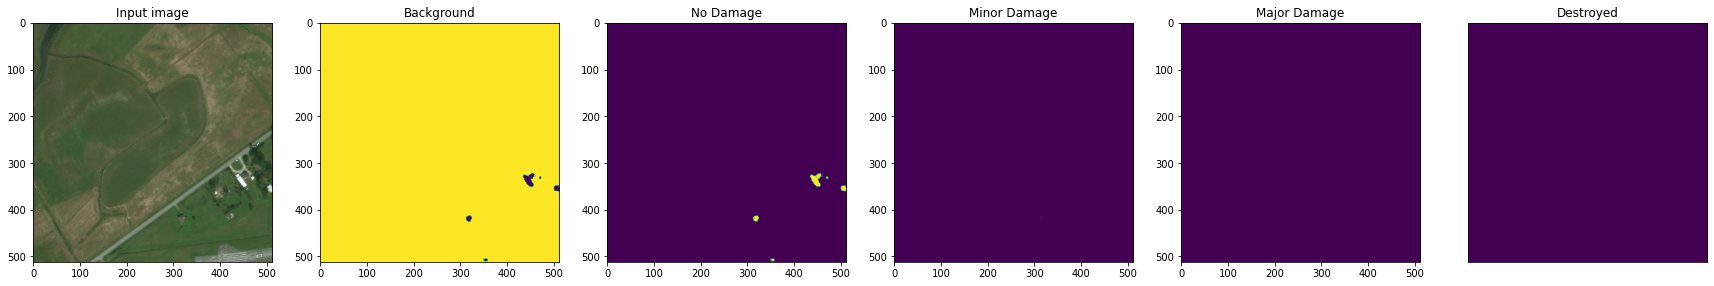

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000357_post_disaster.png
torch.Size([1, 3, 512, 512])


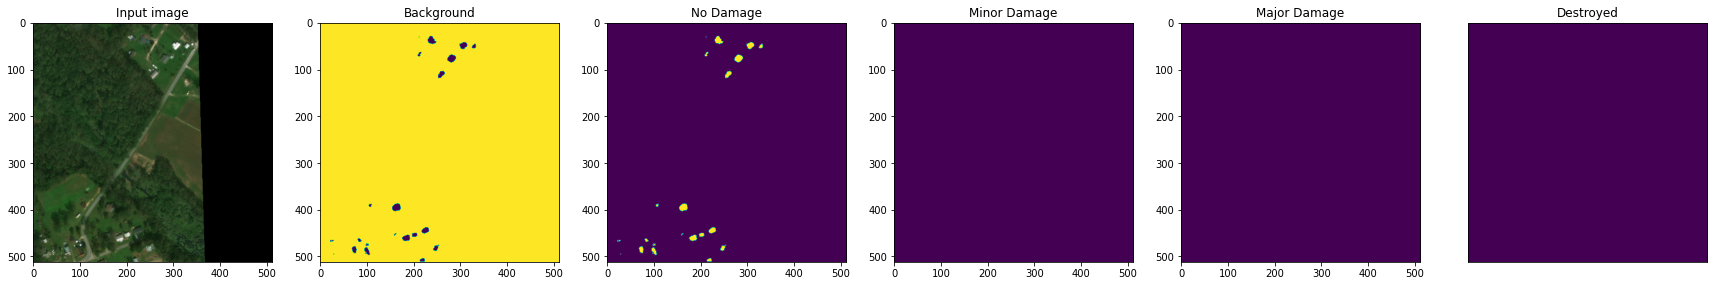

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000359_post_disaster.png
torch.Size([1, 3, 512, 512])


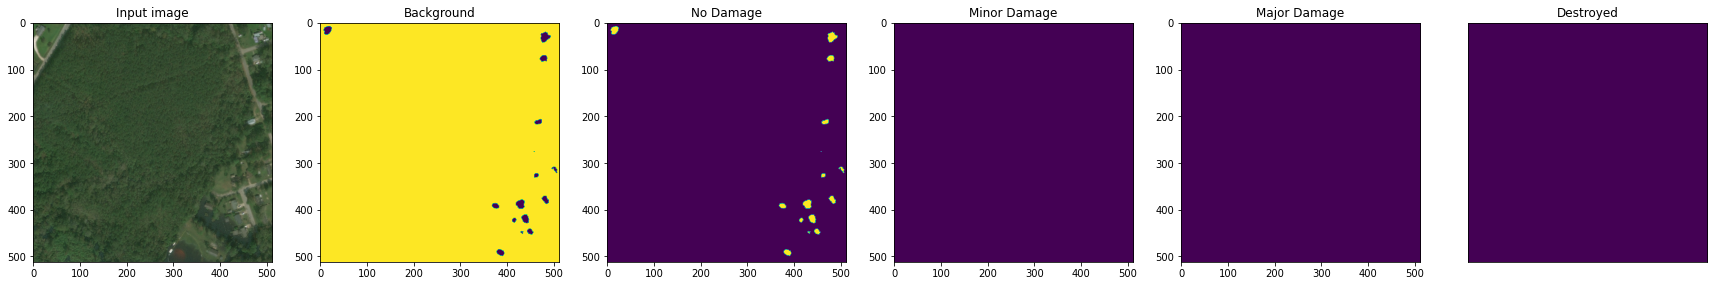

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000360_post_disaster.png
torch.Size([1, 3, 512, 512])


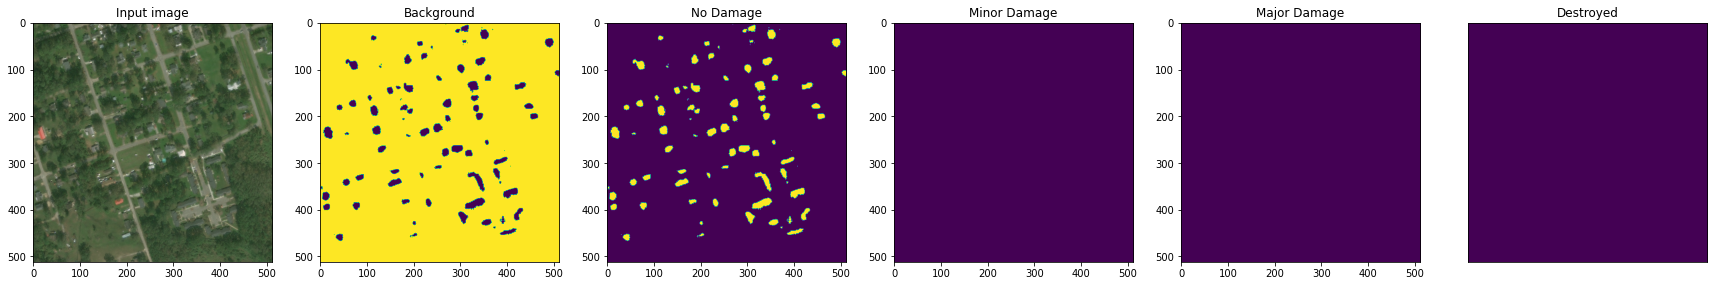

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000361_post_disaster.png
torch.Size([1, 3, 512, 512])


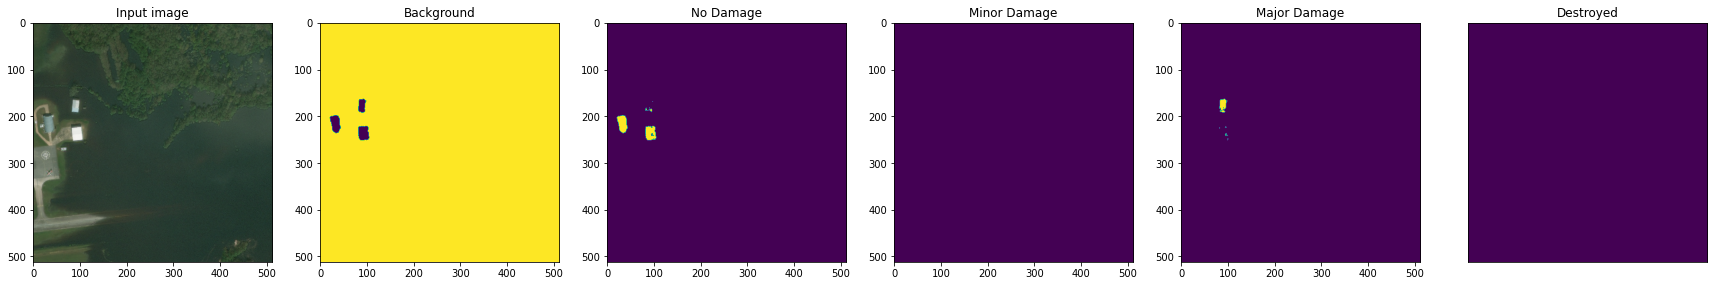

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000362_post_disaster.png
torch.Size([1, 3, 512, 512])


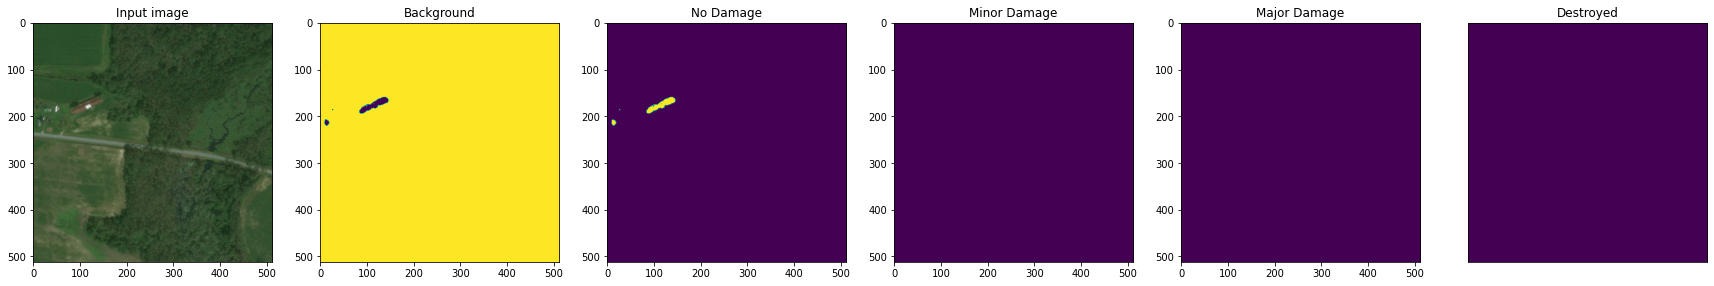

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000365_post_disaster.png
torch.Size([1, 3, 512, 512])


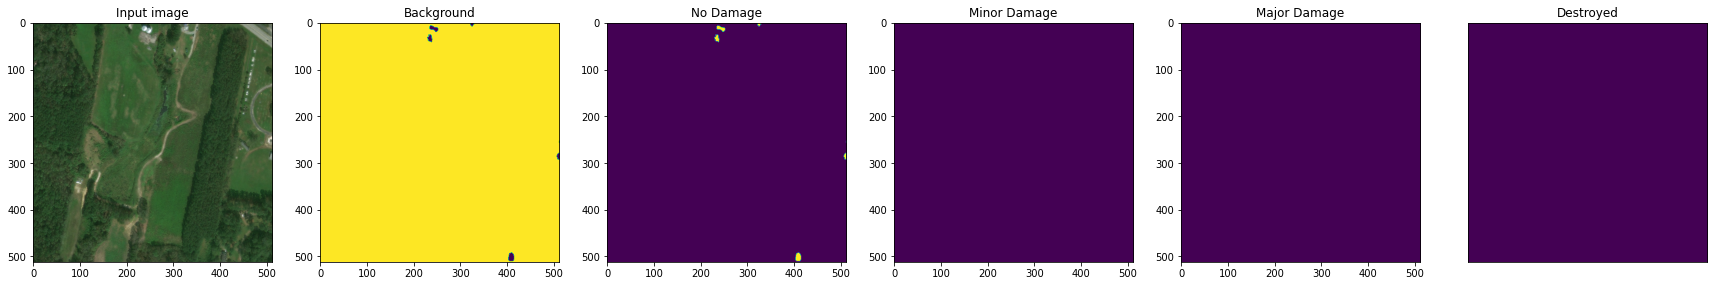

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000366_post_disaster.png
torch.Size([1, 3, 512, 512])


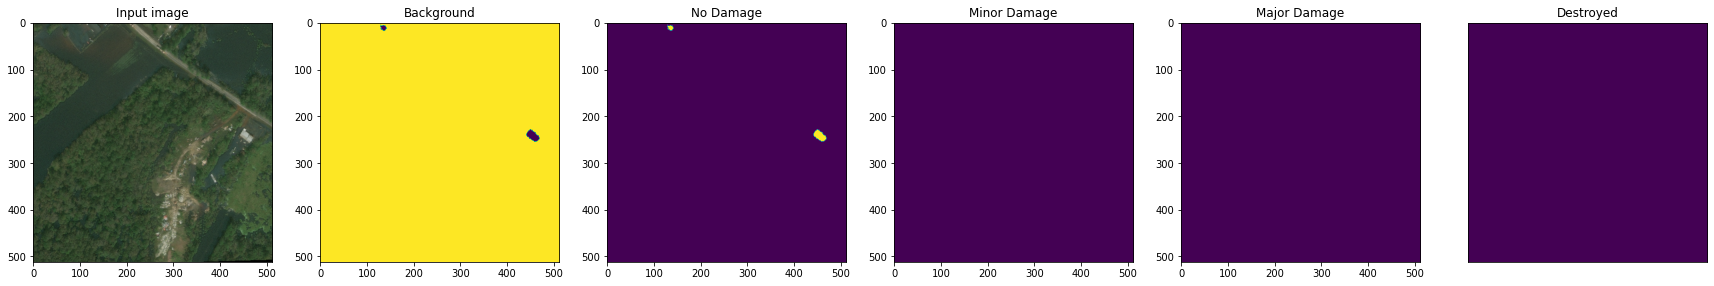

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000368_post_disaster.png
torch.Size([1, 3, 512, 512])


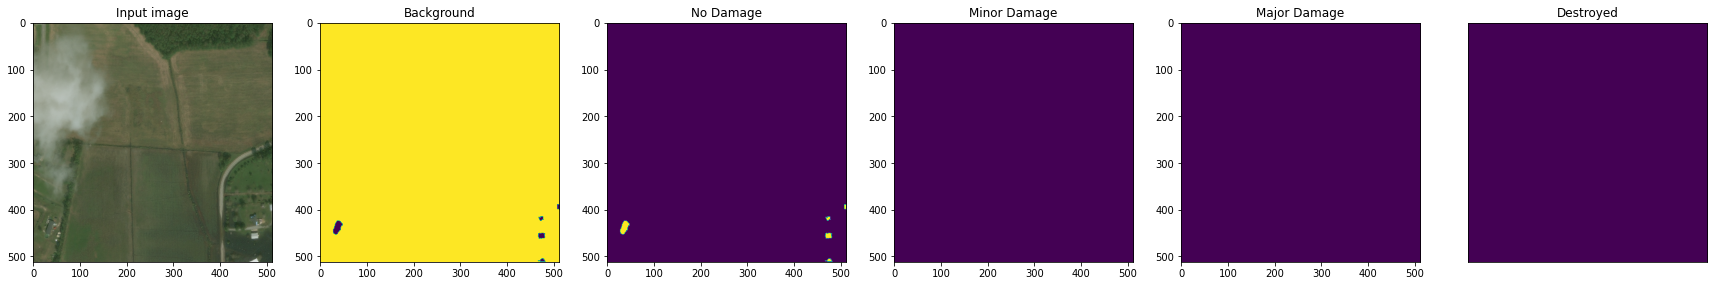

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000369_post_disaster.png
torch.Size([1, 3, 512, 512])


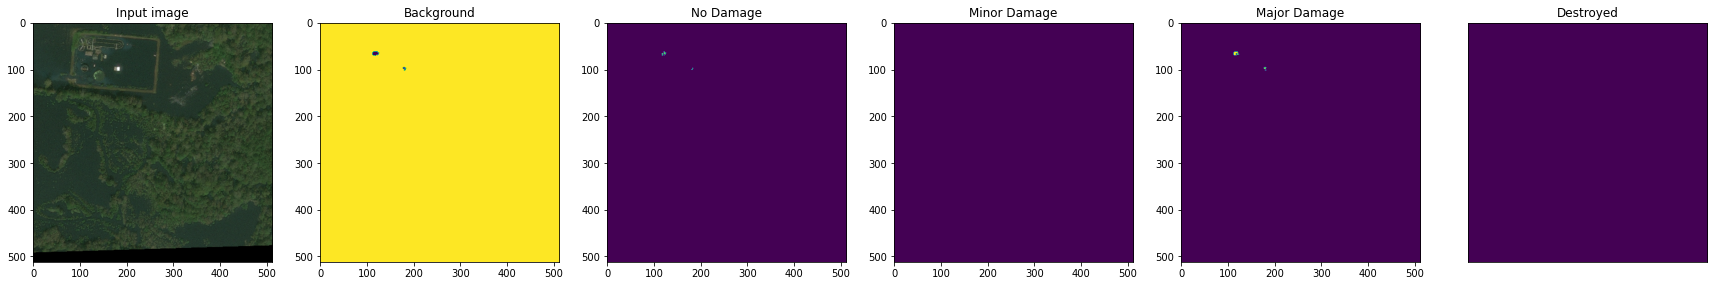

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000370_post_disaster.png
torch.Size([1, 3, 512, 512])


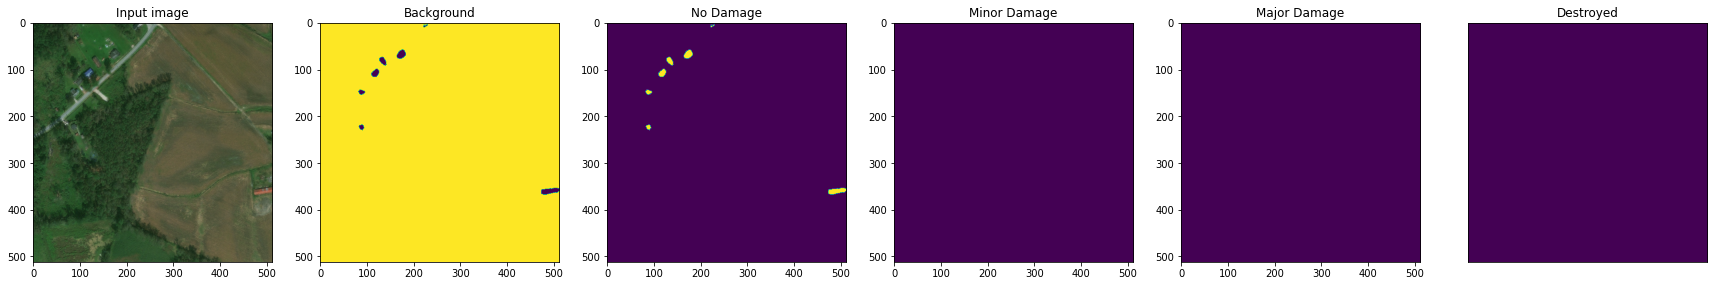

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000371_post_disaster.png
torch.Size([1, 3, 512, 512])


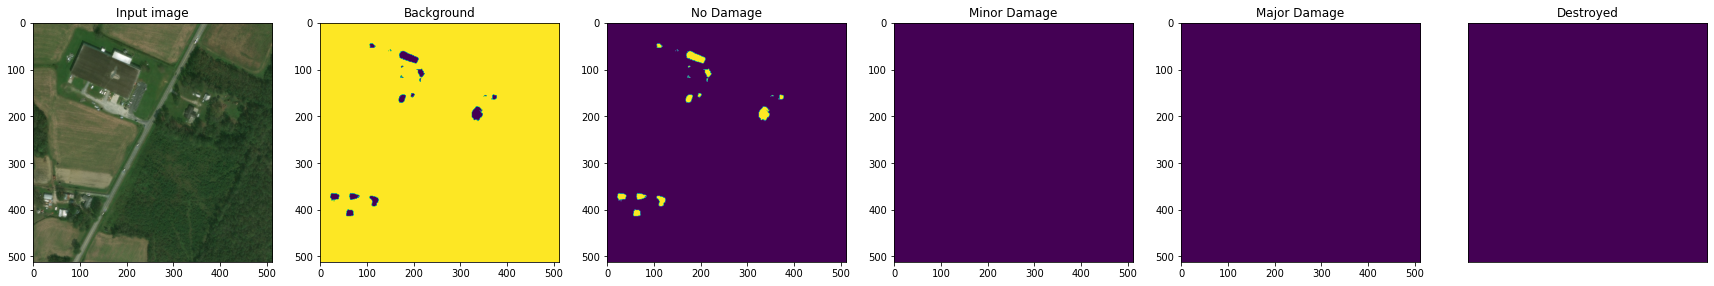

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000372_post_disaster.png
torch.Size([1, 3, 512, 512])


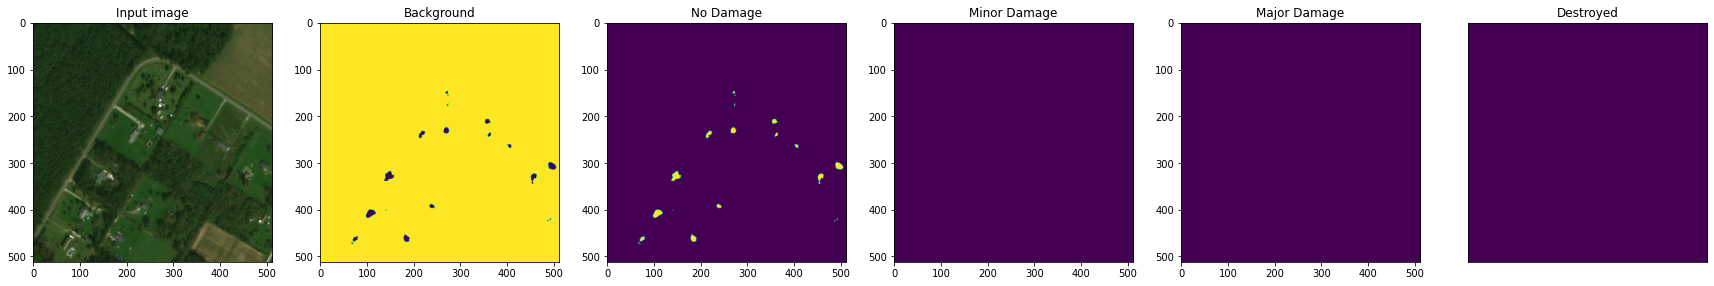

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000374_post_disaster.png
torch.Size([1, 3, 512, 512])


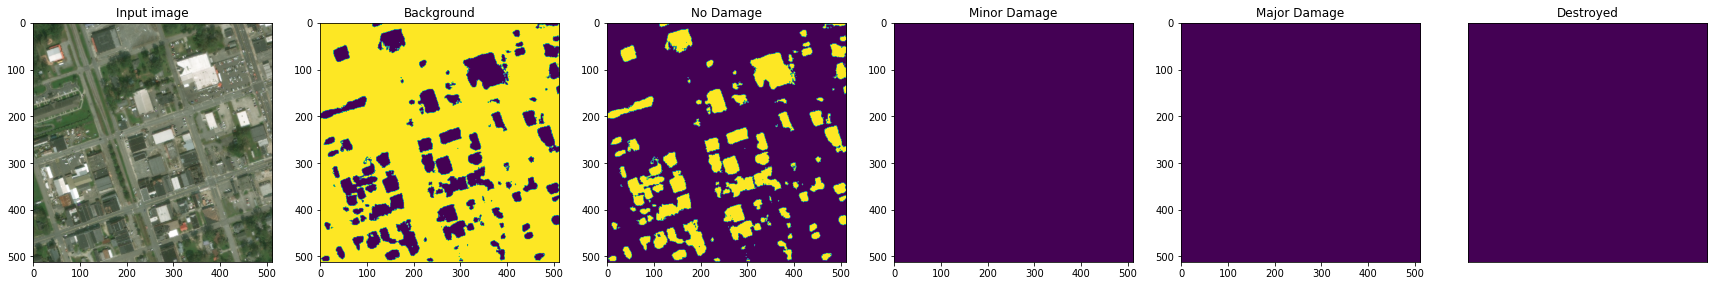

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000376_post_disaster.png
torch.Size([1, 3, 512, 512])


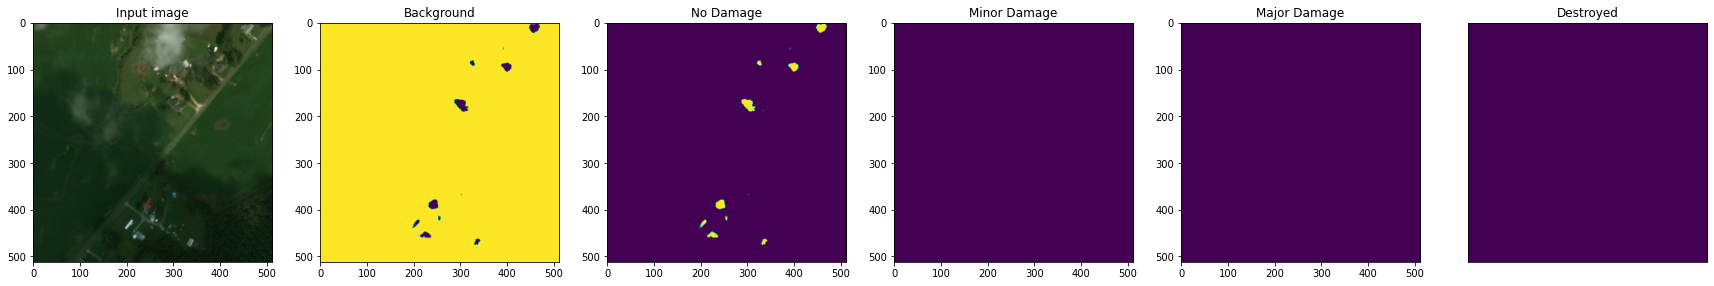

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000379_post_disaster.png
torch.Size([1, 3, 512, 512])


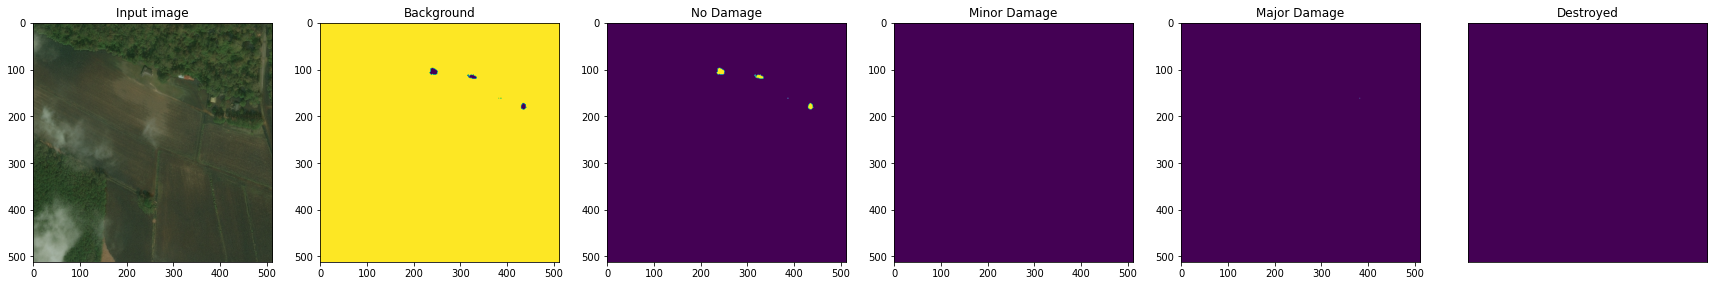

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000380_post_disaster.png
torch.Size([1, 3, 512, 512])


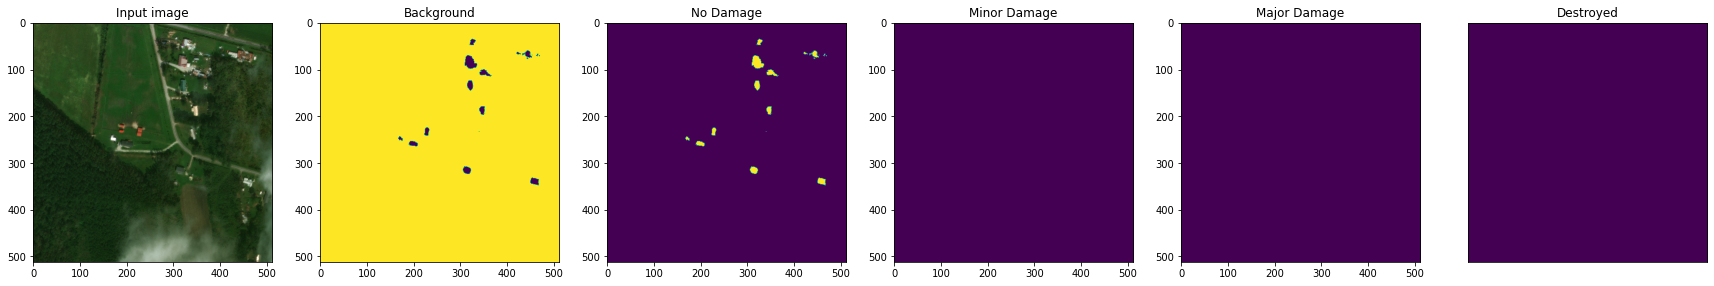

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000381_post_disaster.png
torch.Size([1, 3, 512, 512])


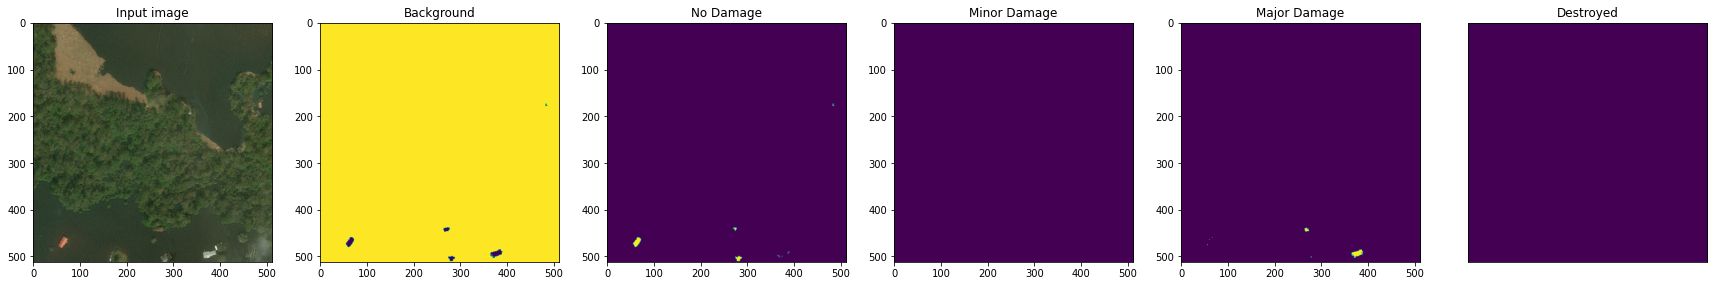

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000382_post_disaster.png
torch.Size([1, 3, 512, 512])


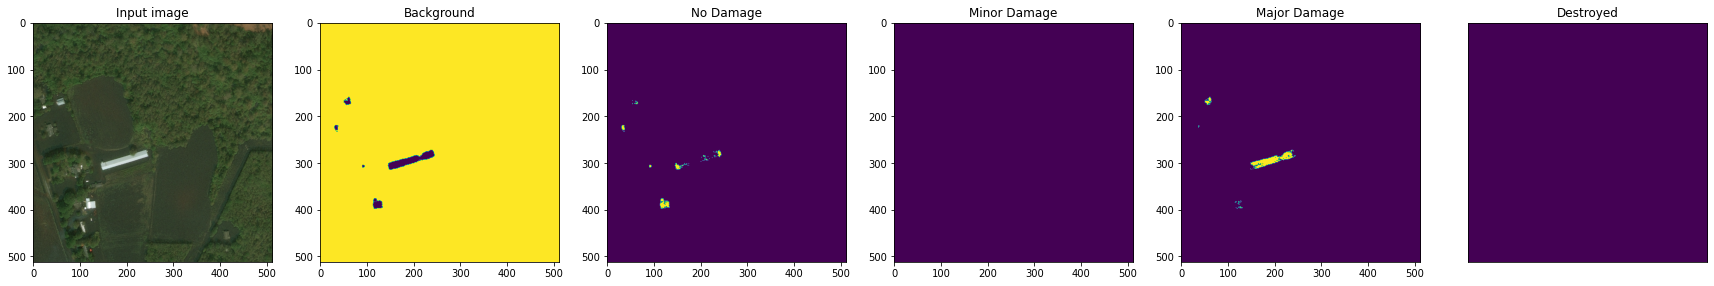

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000387_post_disaster.png
torch.Size([1, 3, 512, 512])


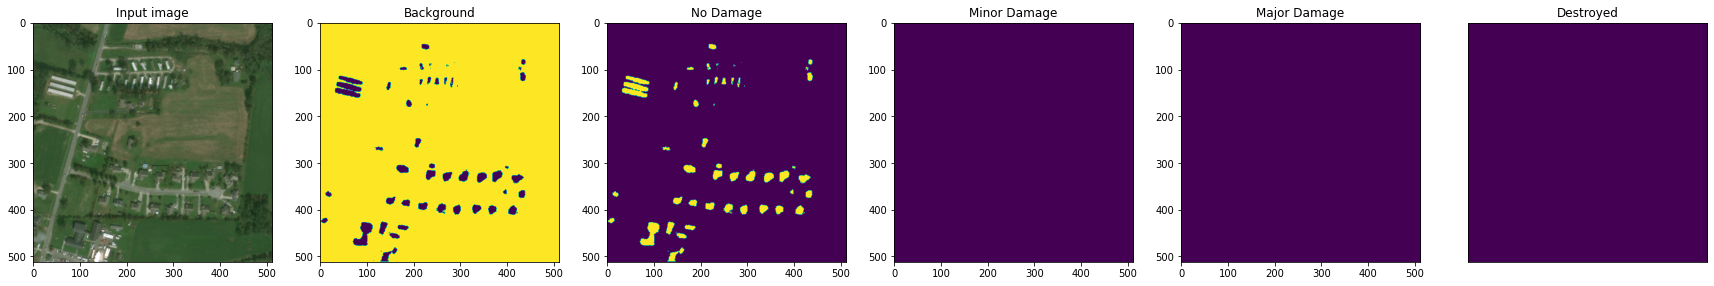

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000388_post_disaster.png
torch.Size([1, 3, 512, 512])


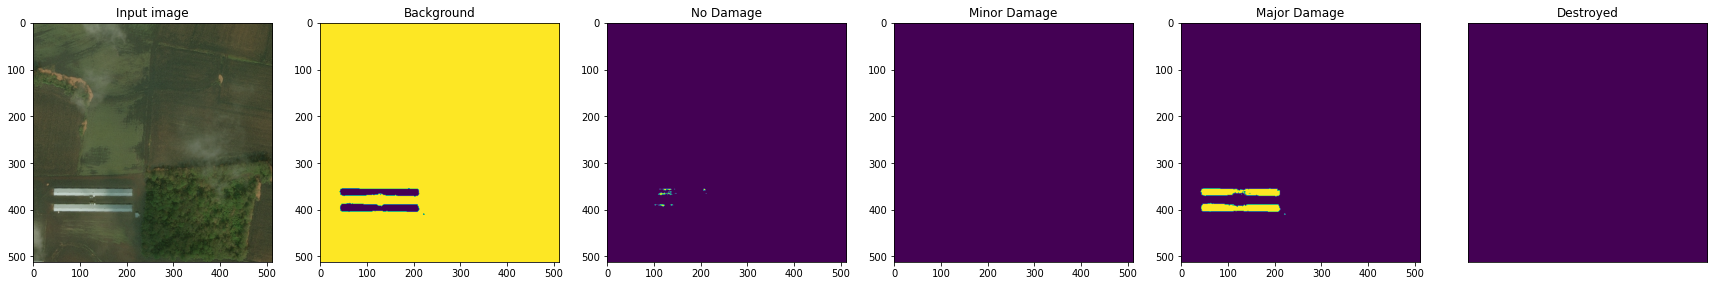

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000389_post_disaster.png
torch.Size([1, 3, 512, 512])


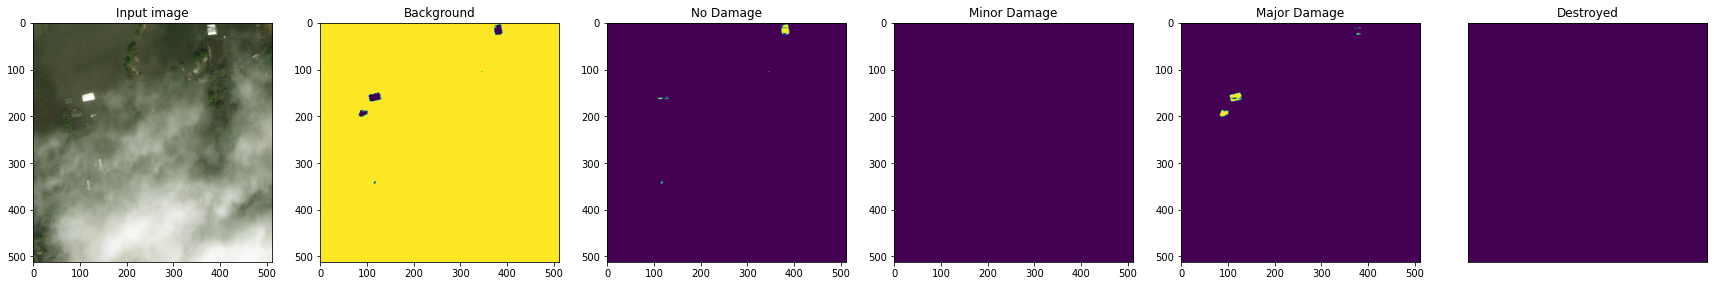

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000390_post_disaster.png
torch.Size([1, 3, 512, 512])


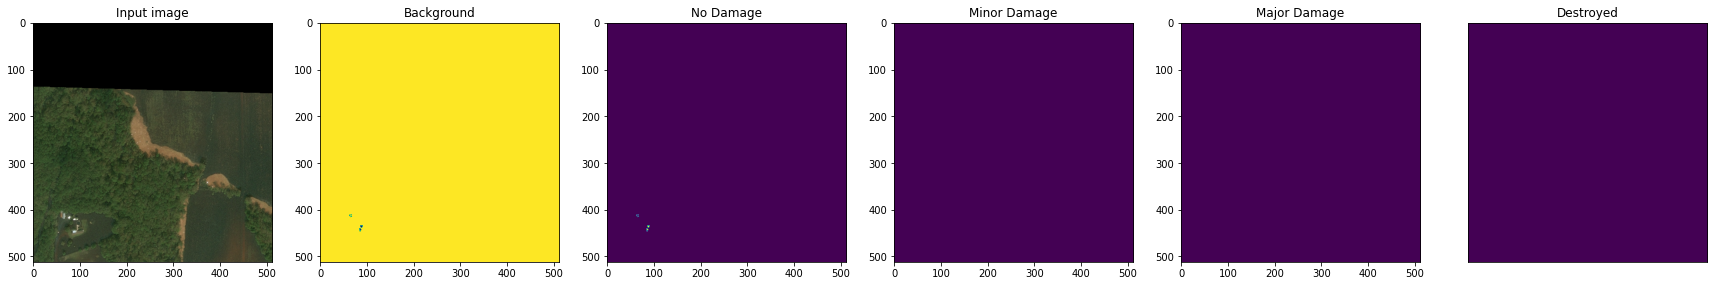

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000392_post_disaster.png
torch.Size([1, 3, 512, 512])


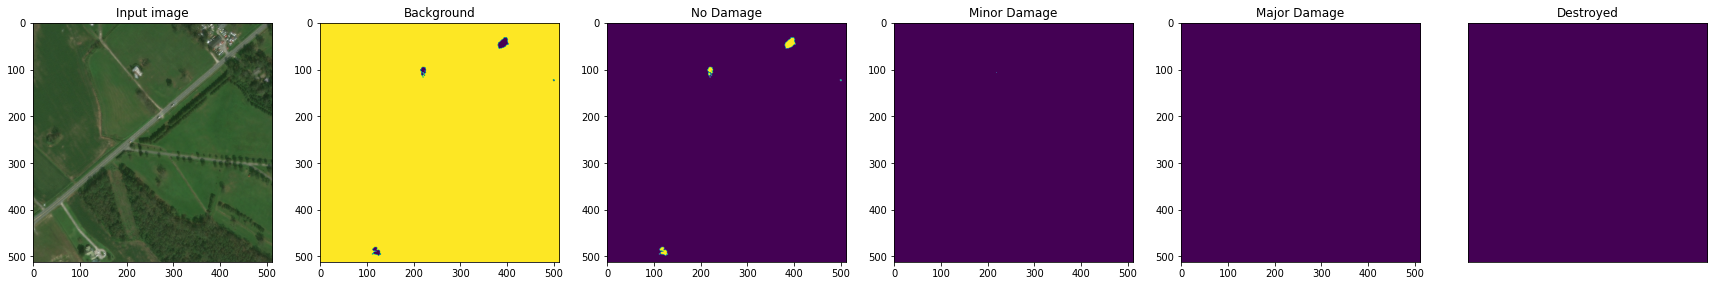

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000393_post_disaster.png
torch.Size([1, 3, 512, 512])


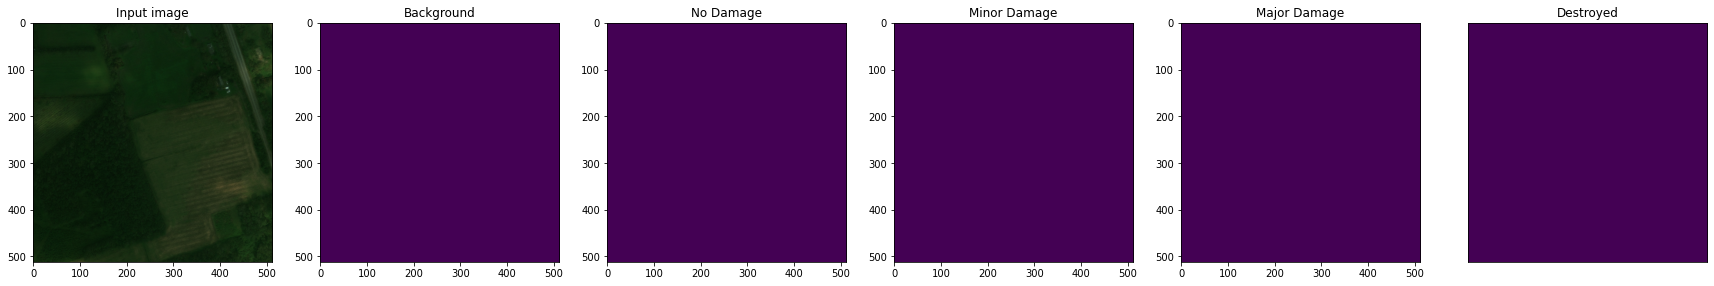

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000394_post_disaster.png
torch.Size([1, 3, 512, 512])


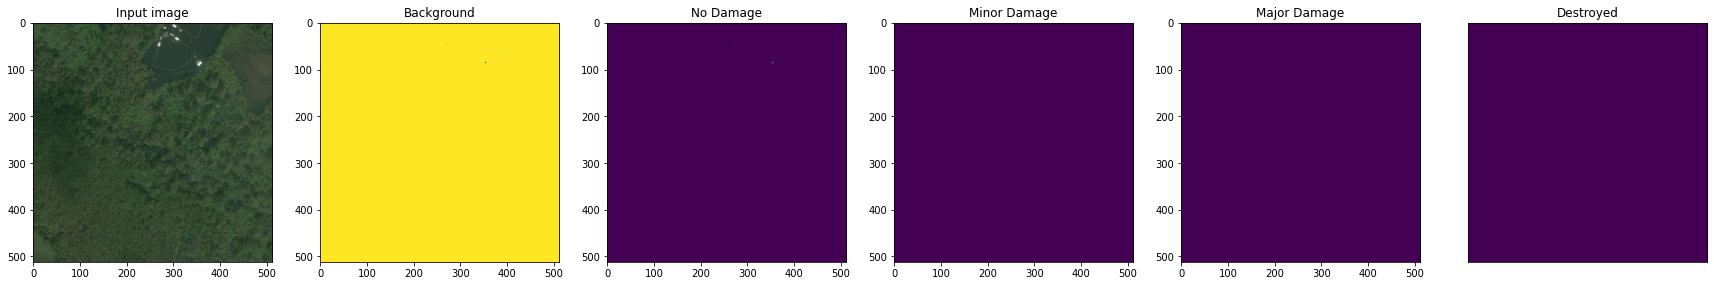

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000395_post_disaster.png
torch.Size([1, 3, 512, 512])


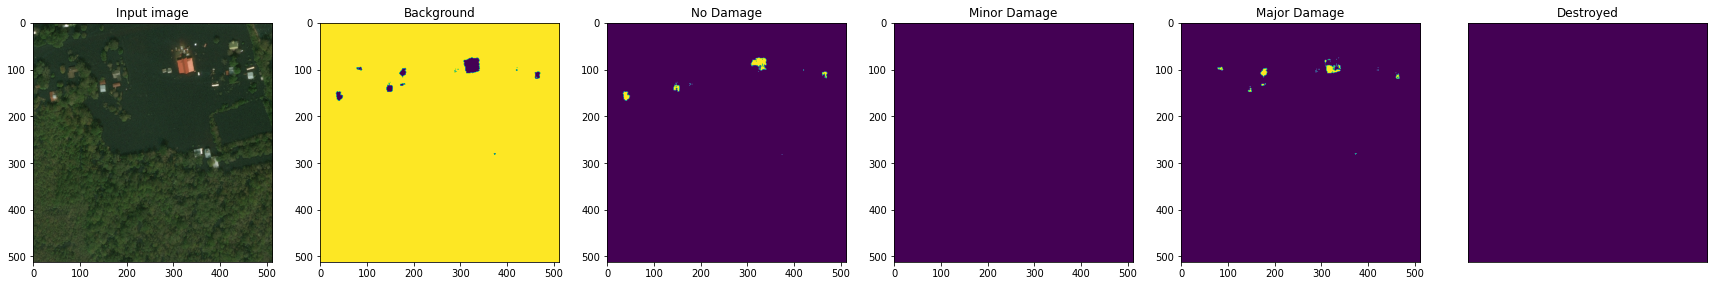

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000397_post_disaster.png
torch.Size([1, 3, 512, 512])


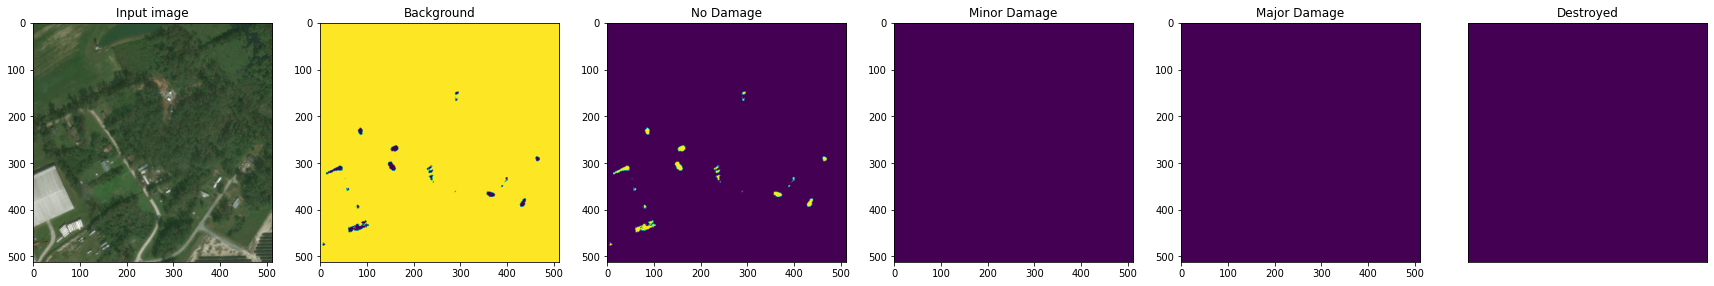

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000398_post_disaster.png
torch.Size([1, 3, 512, 512])


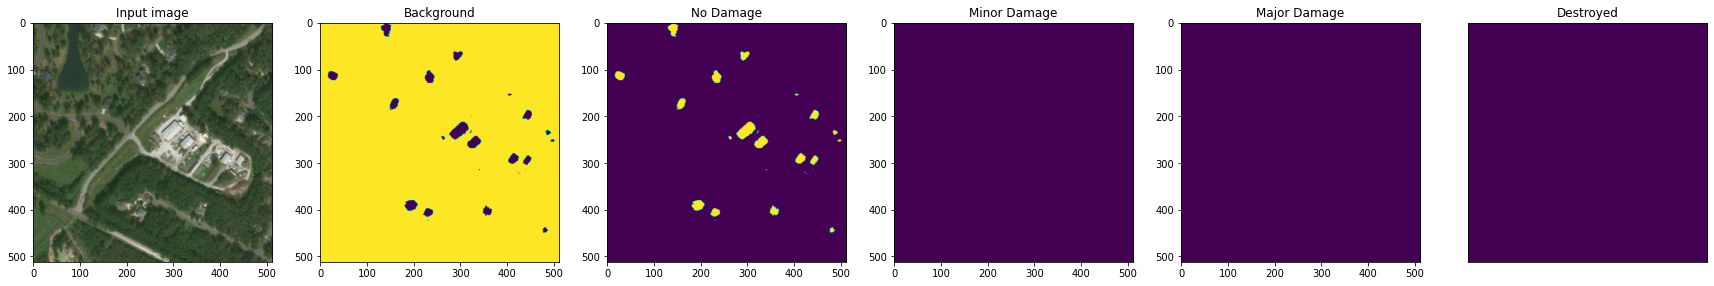

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000399_post_disaster.png
torch.Size([1, 3, 512, 512])


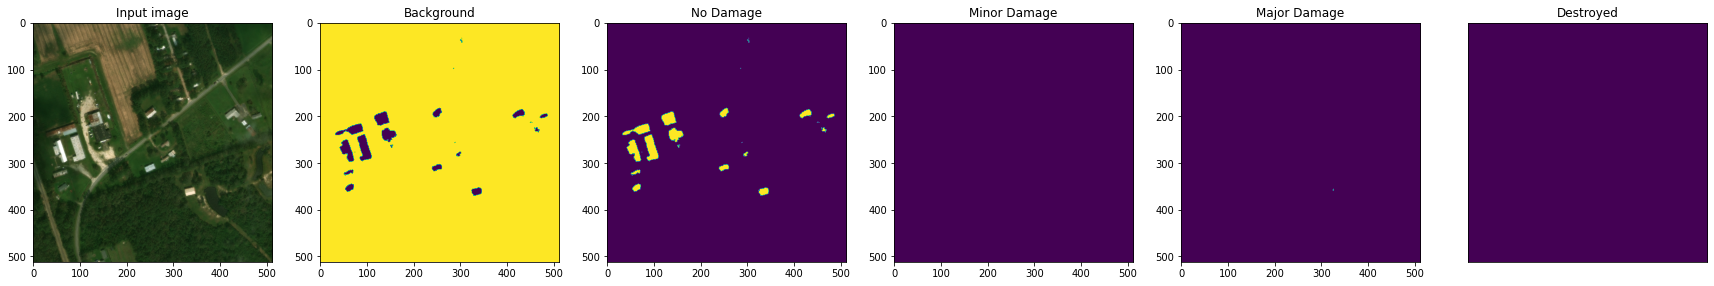

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000401_post_disaster.png
torch.Size([1, 3, 512, 512])


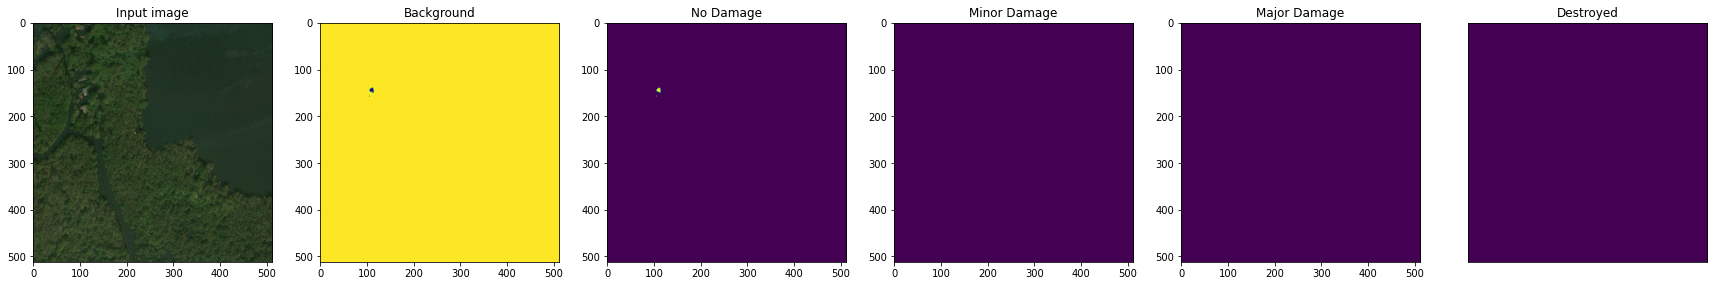

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000403_post_disaster.png
torch.Size([1, 3, 512, 512])


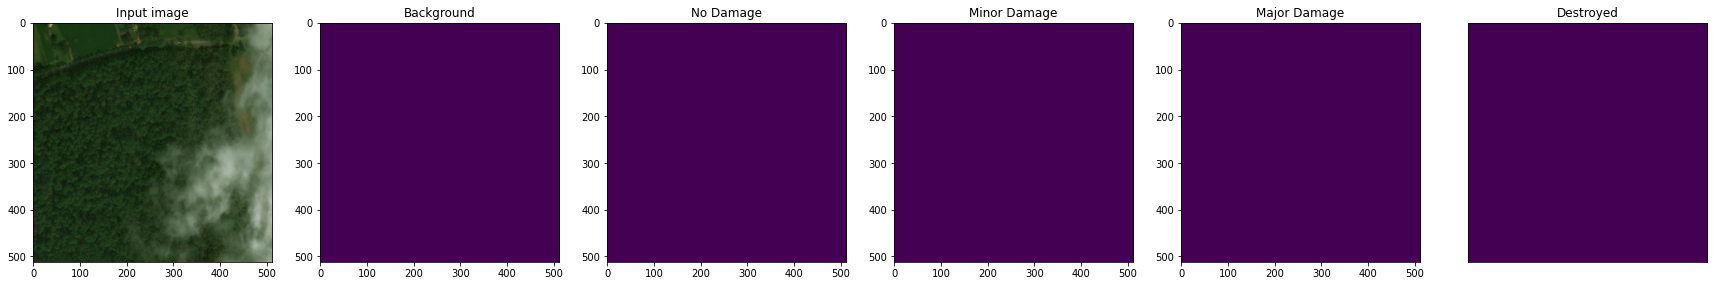

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000404_post_disaster.png
torch.Size([1, 3, 512, 512])


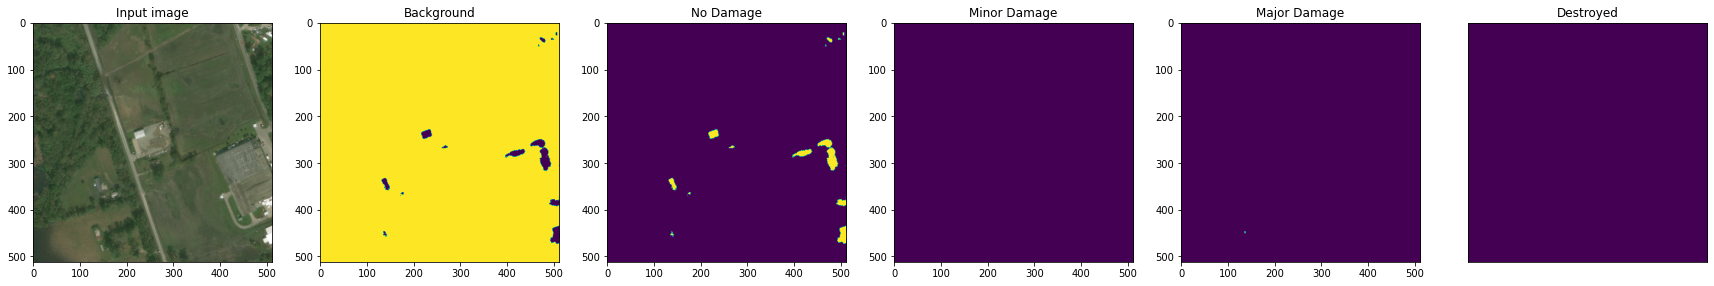

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000405_post_disaster.png
torch.Size([1, 3, 512, 512])


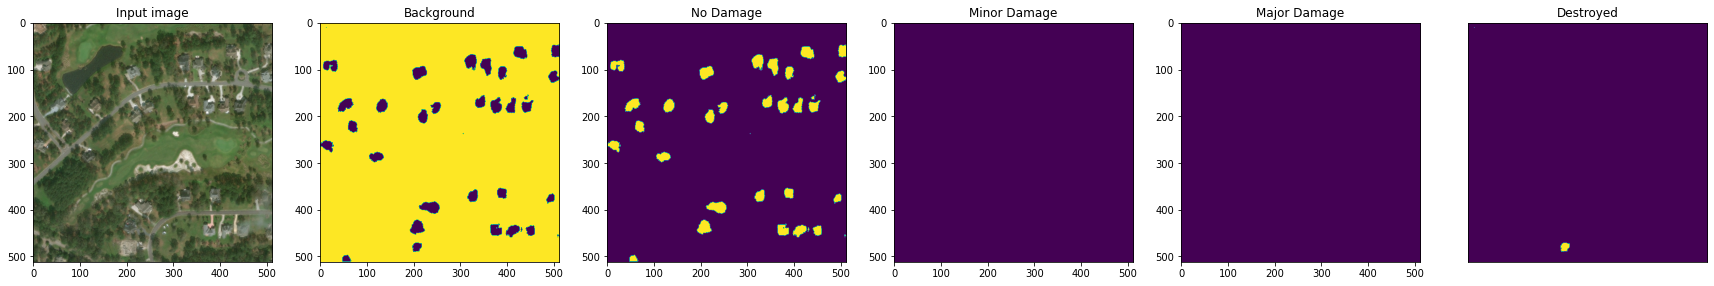

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000406_post_disaster.png
torch.Size([1, 3, 512, 512])


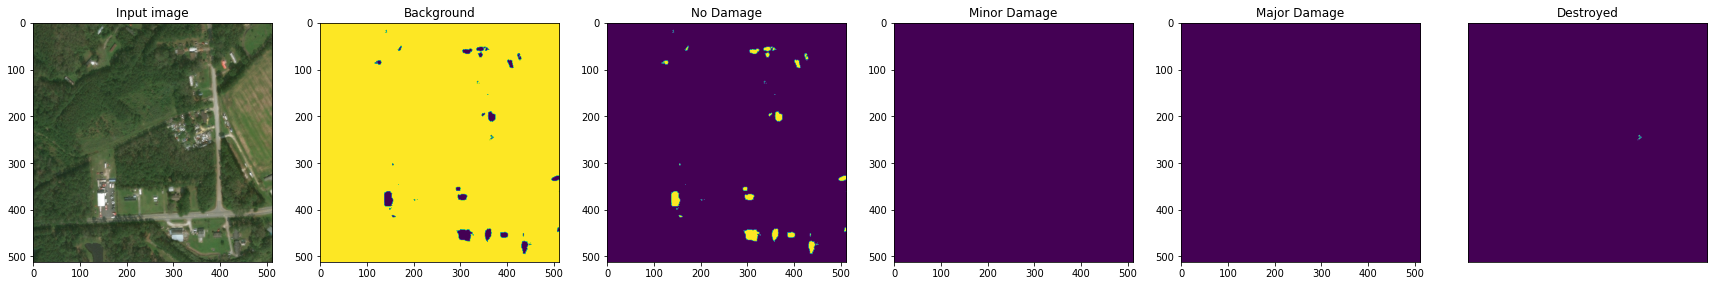

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000407_post_disaster.png
torch.Size([1, 3, 512, 512])


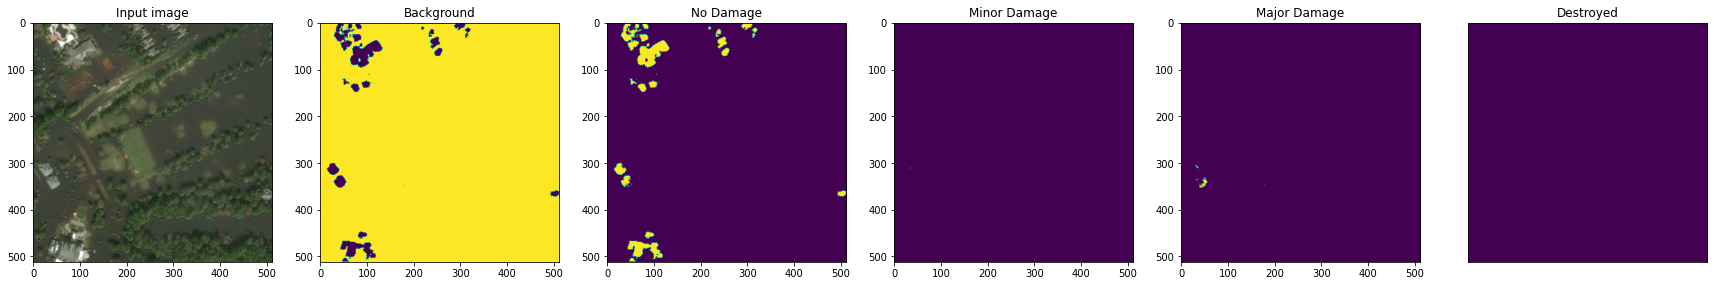

predicting .\Dataset\Tier1\Post\Image512\hurricane-florence_00000408_post_disaster.png
torch.Size([1, 3, 512, 512])


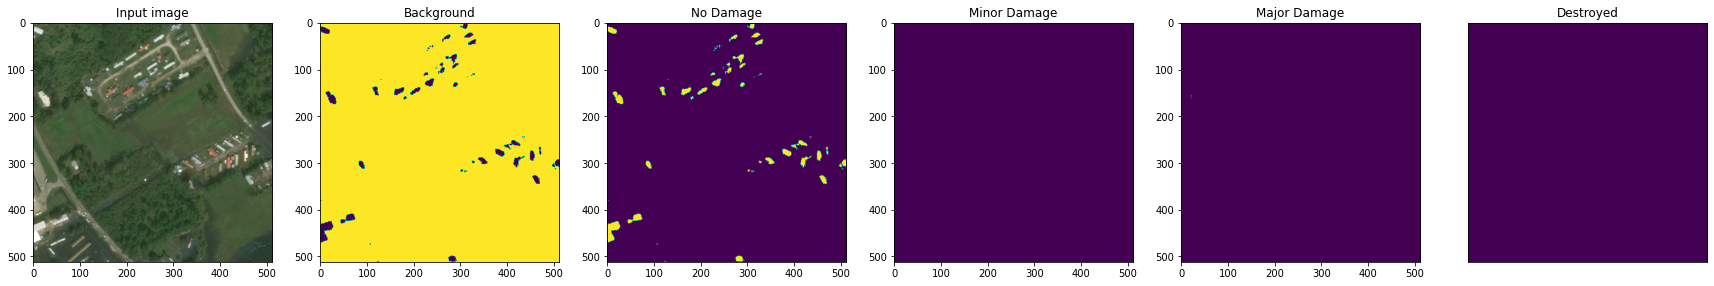

In [6]:
checkpoint = '.\\checkpoints\\Vgg11\\checkpoint_epoch4.pth'
dir_img = '.\\Dataset\\Tier1\\Post\\Image512\\'
dir_mask = '.\\Dataset\\Tier1\\Post\\Label512\\'
mask_threshold = 0.5
no_save = True
viz = True
scale = 1
labels = ['Background','No Damage','Minor Damage','Major Damage','Destroyed']
if __name__ == '__main__':
    in_files = [dir_img + s for s in os.listdir(dir_img)][200:250]
    out_files = [dir_mask + s for s in os.listdir(dir_mask)][200:250]

    #net = UNet(n_channels=3, n_classes=5, bilinear=False)

    net = smp.Unet(
        encoder_name='vgg11',
        encoder_depth=5,
        encoder_weights='imagenet',
        decoder_use_batchnorm=False,
        decoder_channels=(1024,512,256, 128, 64),
        decoder_attention_type=None,
        in_channels=3,
        classes=5,
        activation=None,
        aux_params=None
    )
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('loading model')

    net.to(device=device)
    net.load_state_dict(torch.load(checkpoint, map_location=device))

    print('model loaded')
    for i, filename in enumerate(in_files):
        print('predicting ' + filename)
        img = Image.open(filename)
        mask = predict_img(net=net,
                           full_img=img,
                           scale_factor=scale,
                           out_threshold=mask_threshold,
                           device=device)

        if not no_save:
            out_filename = out_files[i]
            result = mask_to_image(mask)
            result.save(out_filename)

        if viz:
            plot_img_and_mask(img, mask,labels)